## **PEMODELAN DATA**

---


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ast

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.16.1


## 1. Persiapan Dataset

In [3]:
import pandas as pd

file_path = 'balanced_dataset.csv'

data = pd.read_csv(file_path)

data


,Unnamed: 0,tweet,label
0,32636,"['ganjar', 'tegaskan', 'pemilu', 'bersih', 'ta...",Neutral
1,1391,"['bersyukur', 'akan', 'senantiasa', 'diliputi'...",Neutral
2,32150,"['level', 'pemerintah', 'desa', 'salah', 'seor...",Neutral
3,28683,"['apa', 'kalau', 'punya', 'gagasan', 'kasih', ...",Neutral
4,29208,"['tegas', 'ksad', 'baru', 'jenderal', 'tni', '...",Neutral
...,...,...,...
38021,17588,"['deddy', 'dedi', 'jadi']",Love
38022,8365,"['kalau', 'sayang', 'iya', 'sayang', 'pisan', ...",Love
38023,6439,"['benar', 'si', 'setuju', 'sekali', 'soalnya',...",Love
38024,6650,"['my', 'cinta', 'barangnya', 'sampai', 'langsu...",Love


## 2. Preprocessing Data

In [4]:
print(data['label'].value_counts())

label
Sad        7590
Neutral    7316
Joy        6309
Anger      6006
Fear       5423
Love       5382
Name: count, dtype: int64


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Misalkan data memiliki kolom 'tweet' dan 'labels'
tweets = data['tweet']
labels = data['label']

# Mengonversi label menjadi angka
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Membagi data menjadi training dan sisanya (testing + validation)
X_train, X_temp, y_train, y_temp = train_test_split(tweets, labels_encoded, test_size=0.4, random_state=42)

# Membagi sisa data menjadi testing dan validation
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [6]:
print(label_encoder.classes_)

['Anger' 'Fear' 'Joy' 'Love' 'Neutral' 'Sad']


In [7]:
print("Training data:", len(X_train))
print("Testing data:", len(X_test))
print("Validation data:", len(X_val))

Training data: 22815
Testing data: 7605
Validation data: 7606


In [8]:
X_train

7763     ['asli', 'jateng', 'om', 'jelas', 'pilih', 'pa...
22533    ['pihak', 'kemenlu', 'ri', 'perlu', 'cepat', '...
26006    ['ko', 'mau', 'si', 'pasang', 'beli', 'kim', '...
27184    ['terus', 'satu', 'bunda', 'anak', 'asuhnya', ...
19598            ['pemikiran', 'tidak', 'bedanya', 'bong']
                               ...                        
16850    ['mahmoud', 'abbas', 'boneka', 'as', 'sekutuny...
6265     ['suka', 'sekali', 'balas', 'by', 'the', 'way'...
11284                  ['kamu', 'iya', 'isal', 'semangat']
860      ['personil', 'bhabinkamtibmas', 'polsek', 'med...
15795    ['harusnya', 'dibatalkan', 'putusan', 'negeri'...
Name: tweet, Length: 22815, dtype: object

In [9]:
X_test

5754     ['kenal', 'anak', 'mipa', 'tidak', 'kedengaran...
16503    ['wahai', 'ingatlah', 'tahun', 'depan', 'tahun...
1660     ['membahayakan', 'gimana', 'bagaimana', 'foto'...
16703    ['woi', 'goblok', 'ramyat', 'palestina', 'pend...
30937    ['shopee', 'bagaimana', 'cara', 'kembalikan', ...
                               ...                        
33019    ['iya', 'allah', 'cinta', 'sekali', 'sama', 's...
10030    ['bro', 'uki', 'mengatakan', 'sejumlah', 'gera...
29350    ['sangat', 'sayangkan', 'kwalitas', 'kader', '...
22676    ['sumber', 'daya', 'kelangkaan', 'energi', 'te...
90       ['soal', 'n', 'tvone', 'apa', 'pernah', 'membe...
Name: tweet, Length: 7605, dtype: object

In [10]:
X_val

28570    ['sedih', 'dahla', 'yen', 'mahal', 'ibarat', '...
18198    ['tahulah', 'anak', 'luah', 'kat', 'siapa', 't...
12799    ['jelek', 'lhoh', 'mainnya', 'timnas', 'cender...
3103      ['pendidikan', 'menciptakan', 'budi', 'pekerti']
4416     ['bupati', 'imron', 'hadiri', 'deklarasi', 'pe...
                               ...                        
6634     ['kaca', 'lebih', 'enak', 'menurutku', 'boleh'...
29083    ['dibalik', 'kebobolan', 'gol', 'timnas', 'mai...
26786    ['jangan', 'membuat', 'bumi', 'menangis', 'kee...
10850    ['seminar', 'proposal', 'stay', 'positive', 'w...
1442     ['sorry', 'bro', 'koreksi', 'libanon', 'bukan'...
Name: tweet, Length: 7606, dtype: object

## 3. Transform Data

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Tokenisasi data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding sequences
maxlen = 64 # Panjang maksimum dari sequence
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen)
X_val_pad = pad_sequences(X_val_seq, maxlen=maxlen)
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen)

# Mengubah label menjadi tipe numerik
y_train = y_train.astype(int)
y_val = y_val.astype(int)
y_test = y_test.astype(int)


In [12]:
print("X train pad :", X_train_pad)
print("X val pad :", X_val_pad)
print("X test pad :", X_test_pad)

X train pad : [[   0    0    0 ...   43 8576 7301]
 [   0    0    0 ...  992 8578   16]
 [   0    0    0 ...   30   25 4645]
 ...
 [   0    0    0 ...    5    3   83]
 [   0    0    0 ...    1  104   49]
 [   0    0    0 ...   69  419 5465]]
X val pad : [[   0    0    0 ... 3391  265 3829]
 [   0    0    0 ... 1086  141  460]
 [   0    0    0 ... 7546 3555  199]
 ...
 [   0    0    0 ...  718  146 3527]
 [   0    0    0 ... 2851 7269   83]
 [   0    0    0 ... 4441   87 5261]]
X test pad : [[   0    0    0 ...    8  254   22]
 [   0    0    0 ...  265 1773  294]
 [   0    0    0 ... 1452   14  141]
 ...
 [   0    0    0 ... 1084 4409  100]
 [   0    0    0 ...  563 3831 9732]
 [   0    0    0 ...  209 3519   22]]


## 4. Build and Compile Model

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional, Dropout

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=100))  # Increased embedding size
model.add(Bidirectional(LSTM(128, return_sequences=True)))  # Increased LSTM units
model.add(Dropout(0.5))  # Added dropout for regularization
model.add(Bidirectional(LSTM(128)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))  # Added dense layer for complexity
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))  # Output layer

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(model.summary())


c:\Users\TEMP\miniconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [14]:
history = model.fit(X_train_pad, y_train, epochs=10, validation_data=(X_val_pad, y_val))

Epoch 1/10
713/713 ━━━━━━━━━━━━━━━━━━━━ 144s 191ms/step - accuracy: 0.3477 - loss: 1.5673 - val_accuracy: 0.6094 - val_loss: 1.0941
Epoch 2/10
713/713 ━━━━━━━━━━━━━━━━━━━━ 128s 180ms/step - accuracy: 0.7084 - loss: 0.9103 - val_accuracy: 0.6713 - val_loss: 0.9521
Epoch 3/10
713/713 ━━━━━━━━━━━━━━━━━━━━ 126s 177ms/step - accuracy: 0.8090 - loss: 0.6280 - val_accuracy: 0.6927 - val_loss: 0.9548
Epoch 4/10
713/713 ━━━━━━━━━━━━━━━━━━━━ 127s 178ms/step - accuracy: 0.8645 - loss: 0.4623 - val_accuracy: 0.7093 - val_loss: 0.9962
Epoch 5/10
713/713 ━━━━━━━━━━━━━━━━━━━━ 141s 197ms/step - accuracy: 0.8986 - loss: 0.3450 - val_accuracy: 0.7142 - val_loss: 1.1000
Epoch 6/10
713/713 ━━━━━━━━━━━━━━━━━━━━ 135s 189ms/step - accuracy: 0.9248 - loss: 0.2683 - val_accuracy: 0.7235 - val_loss: 1.2930
Epoch 7/10
713/713 ━━━━━━━━━━━━━━━━━━━━ 121s 170ms/step - accuracy: 0.9341 - loss: 0.2235 - val_accuracy: 0.7206 - val_loss: 1.3484
Epoch 8/10
713/713 ━━━━━━━━━━━━━━━━━━━━ 122s 171ms/step - accuracy: 0.9486 -

## 5. Evaluasi Model

In [15]:
from sklearn.metrics import classification_report

loss, accuracy = model.evaluate(X_test_pad, y_test)
print("Testing Accuracy:", accuracy)

# Prediksi dengan data testing
y_pred = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)

# Menampilkan laporan klasifikasi
report = classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_, output_dict=True)
print("Classification Report:\n", classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))


238/238 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - accuracy: 0.7389 - loss: 1.5355
Testing Accuracy: 0.7272846698760986
238/238 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step
Classification Report:
               precision    recall  f1-score   support

       Anger       0.71      0.67      0.69      1167
        Fear       0.70      0.73      0.72      1057
         Joy       0.70      0.68      0.69      1240
        Love       0.75      0.79      0.77      1081
     Neutral       0.69      0.68      0.68      1516
         Sad       0.79      0.81      0.80      1544

    accuracy                           0.73      7605
   macro avg       0.73      0.73      0.73      7605
weighted avg       0.73      0.73      0.73      7605



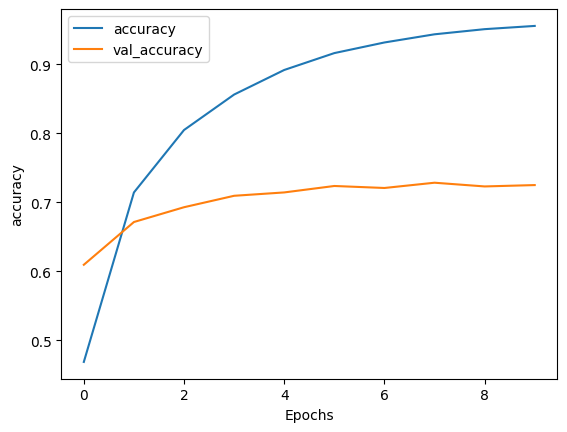

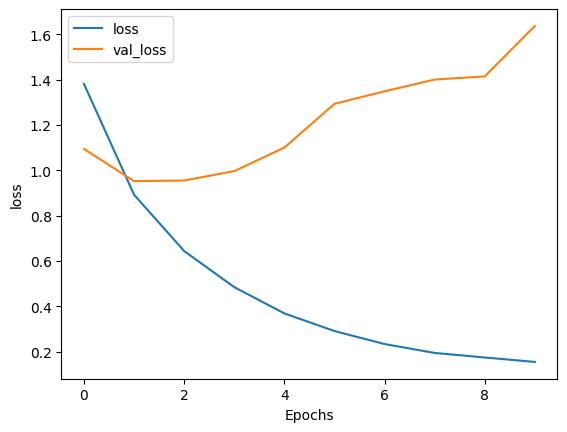

In [16]:
import matplotlib.pyplot as plt

# Fungsi untuk plot grafik training history
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

# Plot grafik akurasi dan loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [17]:
# Evaluasi model dengan data testing
loss, accuracy = model.evaluate(X_test_pad, y_test)
print("Testing Accuracy:", accuracy)


238/238 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.7389 - loss: 1.5355
Testing Accuracy: 0.7272846698760986


## 6. Perhitungan F1 Score

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Prediksi dengan data testing
y_pred = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)

# Menampilkan laporan klasifikasi
report = classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_, output_dict=True)

# Menampilkan F1 Score secara manual
f1_score = report['weighted avg']['f1-score']
print("F1 Score:", f1_score)


238/238 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step
F1 Score: 0.7266761583207201


## 7. Confusion Matriks

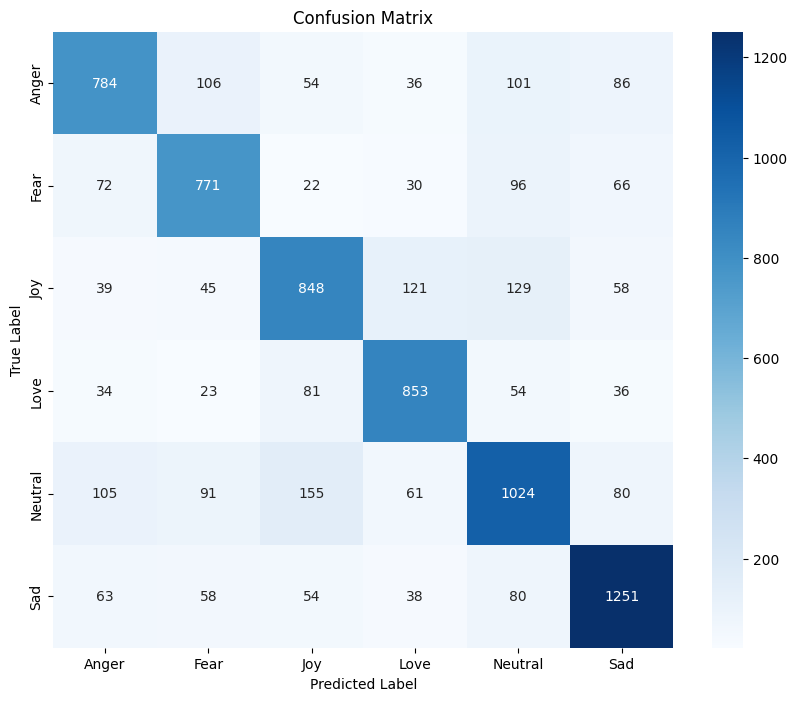

In [19]:
# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Visualisasi confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [20]:
model.save('model.h5')

## 8. Testing

In [21]:
tweets = [
    "Saya merasa sangat cemas tentang ujian besok",
    "Baru saja mendapatkan promosi di kantor! Sangat bahagia",
]

# Fungsi untuk mendapatkan label dari prediksi
def get_label(predict):
    if predict == 0:
        return 'anger'
    if predict == 1:
        return 'joy'
    if predict == 2:
        return 'fear'
    if predict == 3:
        return 'love'
    if predict == 4:
        return 'sad'
    if predict == 5:
        return 'neutral'

# Preprocess the tweets
max_length = 100  # Sesuaikan dengan panjang maksimum yang digunakan selama pelatihan
trunc_type = 'post'

# Tokenize and pad sequences
sample_seqs = tokenizer.texts_to_sequences(tweets)
sample_padded = pad_sequences(sample_seqs, maxlen=max_length, truncating=trunc_type)

# Predict labels for each tweet
predictions = model.predict(sample_padded)

# Print predictions and corresponding labels
for i, tweet in enumerate(tweets):
    prediction = np.argmax(predictions[i])
    label = get_label(prediction)
    print(f"Tweet: {tweet}\nPredicted label: {label}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 666ms/step
Tweet: Saya merasa sangat cemas tentang ujian besok
Predicted label: love

Tweet: Baru saja mendapatkan promosi di kantor! Sangat bahagia
Predicted label: love

